<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Кодирование-категориальных-переменных" data-toc-modified-id="Кодирование-категориальных-переменных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Кодирование категориальных переменных</a></span></li><li><span><a href="#Разделение-на-обучающую,-валидационную-и-тестовую-выборки" data-toc-modified-id="Разделение-на-обучающую,-валидационную-и-тестовую-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разделение на обучающую, валидационную и тестовую выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Сравнение-с-другим-алгоритмом" data-toc-modified-id="Сравнение-с-другим-алгоритмом-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Сравнение с другим алгоритмом</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно будем измерять *AUC-ROC*, сравнивать её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, plot_roc_curve
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('datasets/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Выведем общую информацию о датасете:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Предобработка данных

Переименуем столбцы:

In [5]:
data.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',\
                'gender' , 'age', 'tenure', 'balance', 'number_of_products', 'has_credit_card',\
                'is_active_member', 'estimated_salary', 'exited']

И удалим первый столбец с индексом строки в данных:

In [6]:
data = data.drop('row_number', axis=1)

Приведём столбец 'tenure' к целочисленному типу, так как в нём хранятся только целые значения:

In [7]:
# Посмотрим на уникальные значения столбца 'tenure'
list(data['tenure'].unique())

[2.0, 1.0, 8.0, 7.0, 4.0, 6.0, 3.0, 10.0, 5.0, 9.0, 0.0, nan]

In [8]:
# Приводим к нужному типу
data['tenure'] = data['tenure'].astype('Int64')

Посмотрим на пропуски в данных:

In [9]:
data.isna().sum()

customer_id             0
surname                 0
credit_score            0
geography               0
gender                  0
age                     0
tenure                909
balance                 0
number_of_products      0
has_credit_card         0
is_active_member        0
estimated_salary        0
exited                  0
dtype: int64

Пропуски в столбце "tenure" мы можем заменить на медианное значение по столбцу "tenure":

In [10]:
data['tenure'].median()

5.0

In [11]:
data.loc[(data['tenure'].isna()) , 'tenure'] = int(data['tenure'].median())

### Кодирование категориальных переменных

В датасете есть несколько категориальных столбцов-переменных (geography, gender, has_credit_card, is_active_member), однако последние две уже представлены в виде булевых переменных.

Для обучения моделей нам следует преобразовать столбец "gender" в дамми-переменную (при этом откинув первый столбец, так как по оставшейся переменной можно однозначно восстановить пол):

In [12]:
data['gender'] = pd.get_dummies(data['gender'], drop_first=True)

In [13]:
data.head(10)

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,number_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,1,27,2,134603.88,1,1,1,71725.73,0


Аналогично поступим со столбцом "geography":

In [14]:
data = data.drop('geography', axis=1).join(pd.get_dummies(data['geography']))

In [15]:
data.head()

,customer_id,surname,credit_score,gender,age,tenure,balance,number_of_products,has_credit_card,is_active_member,estimated_salary,exited,France,Germany,Spain
0,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### Разделение на обучающую, валидационную и тестовую выборки

Разделим данные на обучающую, валидационную и тестовую выборку в соотношении 50/25/25:

In [16]:
features = data.drop(['exited', 'surname', 'customer_id'], axis=1)
target = data['exited']

In [17]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target,
                                                                              test_size=0.5, random_state=12345)

In [18]:
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid,
                                                                              test_size=0.5, random_state=12345)

Проверим размеры выборок:

In [19]:
print("Обучающая выборка:", features_train.shape)
print("Валидационная выборка:", features_valid.shape)
print("Тестовая выборка:", features_test.shape)

Обучающая выборка: (5000, 12)
Валидационная выборка: (2500, 12)
Тестовая выборка: (2500, 12)


### Масштабирование признаков

Масштабируем наши признаки:

In [20]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'number_of_products', 'estimated_salary']

In [21]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [22]:
pd.options.mode.chained_assignment = None
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Исследование задачи

Посмотрим, как распределены классы, т.е. значения в столбце "exited":

In [23]:
target.value_counts()

0    7963
1    2037
Name: exited, dtype: int64

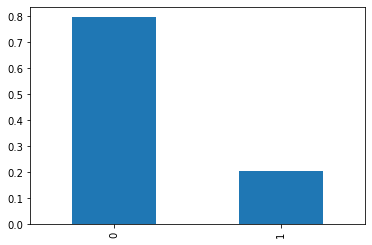

In [24]:
target.value_counts(normalize=True).plot(kind='bar');

Таким образом, **преобладает отрицательный класс**. Примерное соотношение классов - 80% на 20%

Подберём и обучим наилучшую модель случайного леса без учёта дисбаланса классов:

In [25]:
%%time

best_model = None
max_score = -1
for depth in range(1,15):
    for estimators in range(5,100,5):
        model = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state=12345)
        model.fit(features_train, target_train)
        score = f1_score(target_valid, model.predict(features_valid))
        if score> max_score:
            max_score = score
            best_model = model

CPU times: user 48.7 s, sys: 864 ms, total: 49.6 s
Wall time: 50.6 s


Посмотрим на параметры наилучшей модели:

In [26]:
print("Наибольшая глубина дерева:", best_model.max_depth)
print("Количество деревьев:", best_model.n_estimators)
print("F1-score:", max_score)

Наибольшая глубина дерева: 13
Количество деревьев: 65
F1-score: 0.5732009925558313


Посмотрим также на метрику AUC-ROC:

In [27]:
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.8324755715776493


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


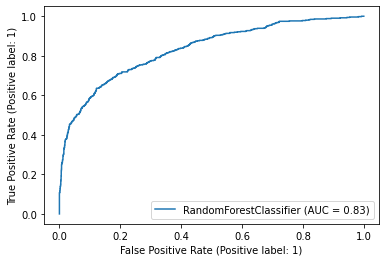

In [28]:
plot_roc_curve(best_model, features_valid, target_valid);

Как известно, AUC-ROC для случайной модели составляет 0,5. В нашем же случае, AUC-ROC значительно выше, что говорит о том, что наша модель имеет место быть.

Таким образом, присутствует дисбаланс классов. Следовательно, при upsampling'e потребуется увеличить размер примеров "положительного" класса в ~4 раза. При downsampling'е же, наоборот, потребуется уменьшить размер примеров отрицательного класса в 4 раза.

## Борьба с дисбалансом

### Взвешивание классов

Попробуем повысить значение метрики F1 за счёт **взвешивания классов**. Для этого всё так же будем обучать модель случайного леса, но уже с параметром class_weight='balanced'

In [29]:
%%time

best_model = None
max_score = -1
for depth in range(1,15):
    for estimators in range(5,100,5):
        model = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state=12345,
                                      class_weight = 'balanced')
        model.fit(features_train, target_train)
        score = f1_score(target_valid, model.predict(features_valid))
        if score> max_score:
            max_score = score
            best_model = model

CPU times: user 49.2 s, sys: 961 ms, total: 50.2 s
Wall time: 50.9 s


И снова посмотрим на параметры самой лучшей обученной модели:

In [30]:
print("Наибольшая глубина дерева:", best_model.max_depth)
print("Количество деревьев:", best_model.n_estimators)
print("F1-score:", max_score)

Наибольшая глубина дерева: 10
Количество деревьев: 65
F1-score: 0.5951417004048583


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


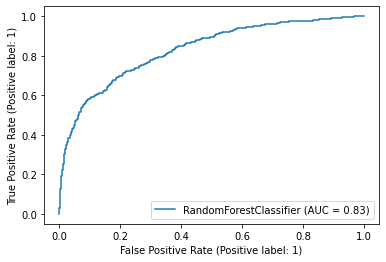

In [31]:
plot_roc_curve(best_model, features_valid, target_valid);

Значения метрик вполне неплохие, однако всё же попробуем применить и другие методы борьбы с дисбалансом классов:

### Upsampling

Напишем функцию для увеличения размера положительного класса:

In [32]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

Преобразуем наши обучающие данные:

In [33]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Подберём оптимальные параметры модели:

In [34]:
%%time

best_model = None
max_score = -1
for depth in range(1,15):
    for estimators in range(5,100,5):
        model = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state=12345)
        model.fit(features_upsampled, target_upsampled)
        score = f1_score(target_valid, model.predict(features_valid))
        if score> max_score:
            max_score = score
            best_model = model

CPU times: user 1min 2s, sys: 903 ms, total: 1min 3s
Wall time: 1min 4s


In [35]:
print("Наибольшая глубина дерева:", best_model.max_depth)
print("Количество деревьев:", best_model.n_estimators)
print("F1-score:", max_score)

Наибольшая глубина дерева: 14
Количество деревьев: 35
F1-score: 0.5917753259779338


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


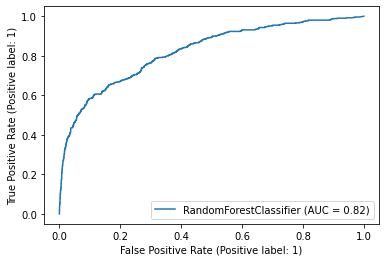

In [36]:
plot_roc_curve(best_model, features_valid, target_valid);

Вышло совсем чуть хуже, чем при взвешивании классов (это подтверждает и AUC-ROC)

### Downsampling

Напишем функцию для уменьшения размера отрицательного класса:

In [37]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

Преобразуем наши обучающие данные:

In [38]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.33)

Подберём оптимальные параметры модели:

In [39]:
%%time

best_model = None
max_score = -1
for depth in range(1,15):
    for estimators in range(5,100,5):
        model = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state=12345)
        model.fit(features_downsampled, target_downsampled)
        score = f1_score(target_valid, model.predict(features_valid))
        if score> max_score:
            max_score = score
            best_model = model

CPU times: user 31.5 s, sys: 355 ms, total: 31.8 s
Wall time: 32.4 s


In [40]:
print("Наибольшая глубина дерева:", best_model.max_depth)
print("Количество деревьев:", best_model.n_estimators)
print("F1-score:", max_score)

Наибольшая глубина дерева: 14
Количество деревьев: 50
F1-score: 0.588235294117647


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


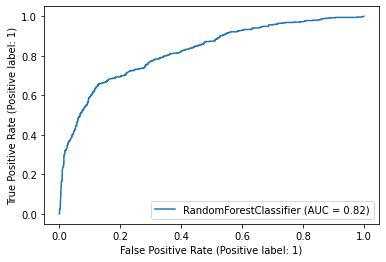

In [41]:
plot_roc_curve(best_model, features_valid, target_valid);

Качество такой модели немного ниже, чем при upsampling'е и при взвешивании классов.

### Сравнение с другим алгоритмом

Для сравнения также обучим модель логистической регрессии с взвешиванием классов:

In [42]:
model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

Проверим значение F1 метрики на валидационной выборке:

In [43]:
f1_score(target_valid, model.predict(features_valid))

0.45611610228058047

И посмотрим на AUC-ROC:

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


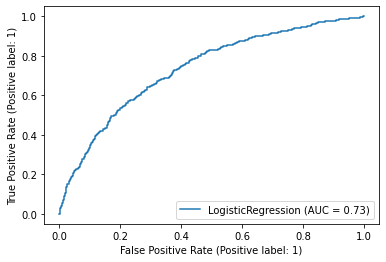

In [44]:
plot_roc_curve(model, features_valid, target_valid);

Получилось значительно хуже, чем у случайного леса, поэтому такую модель можно отбросить.

К слову, если убрать параметр class_weight и не использовать взвешивание классов, то F1 метрика упадёт почти в 1,5 раза.

## Тестирование модели

Наилучшей оказалась модель случайного леса с максимальной глубиной дерева, равной 9, и количеством деревьев, равным 45. При этом следует использовать взвешивание классов:

In [45]:
best_model = RandomForestClassifier(n_estimators = 45, max_depth = 9, random_state=12345,
                                    class_weight='balanced')
best_model.fit(features_train, target_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=45,
                       random_state=12345)

In [46]:
f1_score(target_test, best_model.predict(features_test))

0.6307837582625119

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


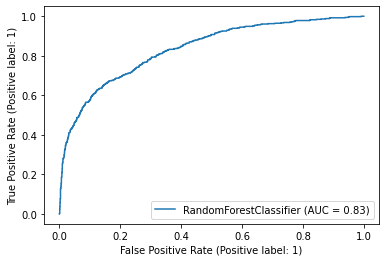

In [47]:
plot_roc_curve(best_model, features_valid, target_valid);

Значение метрики F1 на тестовой выборке составило **~63.6%**, что выше требуемого порога в 59%.

Значение площади под ROC-кривой составило примерно 0.83, что говорит о том, что наша модель работает значительно лучше "случайной модели".

Таким образом, полученная модель может использоваться для прогнозирования факта того, что клиент с определёнными признаками уйдёт

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*